# Laserscanning - Exercise 6

#### Please upload the implemented solutions till <u>13.12.2022</u> to the studip folder of your group. The file should follow this format:
##### EX06_Group_XX.ipynb (e.g. EX06_Group_04.ipynb)
(In case you need to upload additional files, please also upload them using the same schema, e.g. EX06_Group_04.zip)

# RANSAC optimization
In this task we will optimize the implementation of RANSAC from our previous assignment. The runtime of the RANSAC algorithm depends on the required number of draws and the time, the algorithm needs to process them. In this task you have to improve the RANSAC algorithm of the last exercise under the aspect of runtime complexity. You will need the lecture script No. 5 “Segmentation I” and 6 “Segmenation II” (download: Stud.IP) to complete this assignment. Use the methods presented in script 6 (slides ~9-11) to reduce the runtime.

Instead of drawing random points draw points from the neighborhood:
- Choose one point $p_1$ randomly
- Draw points $p_2$ and $p_3$ in the neighborhood of $p_1$
- Consider threshold!
    - Min radius to avoid effects by noise
    - Max radius in order not to draw $p_2$ and $p_3$ from another plane.
- Use Kd-tree for range search

In [1]:
from plyfile import PlyData
import numpy as np
from imageio import imread
import math

Use the next cell to copy your ransac implementation from the previous assignment or import the functions

In [2]:
### BEGIN SOLUTION

import random
# example of usage of random
#print(random.sample(range(1, 100), 4))


def plane_from_3_points(points):
    """Determine the normal vector of a plane given 3 points    
    :params:
        points - list of 3 points
    :return:
        (n,d) - Hesse normal form of a plane
                n - normalized normal vector
                d - distance from origin
    """
    ### BEGIN SOLUTION
    
    n = np.cross(points[1]-points[0], points[2]-points[0])
    #print(n)
    #n_normal = n/np.linalg.norm(n,axis=0)
    n_normal = n/math.sqrt(n[0]**2+n[1]**2+n[2]**2)
    #print(n_normal)
    d = -np.dot(n_normal,points[0])
    n = n_normal
    ### END SOLUTION
    
    #raise NotImplementedError()
    
    return n, d    


def count_consensus(n,d,max_diff,points):
    """Count the consensus and gives back the line numbers of the corresponding points        
    :params:
        n - normal vector of the plane
        d - distance of the plane from origin
        max_diff - max distance of a point to plane
        points - array of points
    :return:
        new_points - list - Consensual points
        outliers - list - Outlier points
    """
    ### BEGIN SOLUTION
    new_points = []
    new_outliers = []
    for i in range(len(points)):
 
        p = points[i]
        d_pp = abs(p[0]*n[0]+p[1]*n[1]+p[2]*n[2]+d) #distance 
        
        if d_pp <= max_diff:
            new_points.append(p)
        else:
            new_outliers.append(p)
    #outliers=len(outliers)/len(points)
            
    ### END SOLUTION
    
    #raise NotImplementedError()
    
    return new_points, new_outliers

import math



### END SOLUTION

#raise NotImplementedError()

Implement the improved version of the ransac algorithm using kd-tree

In [3]:
from sklearn.neighbors import KDTree
import math
import random
import math
def find_random_points_opt(samplesize, points, min_radius, max_radius, tree):
    """Finds a set of unique random points from a point cloud which are in 
    between a certain distance of a given point
    :params:
        samplesize - size of the generated set
        points - set of points from which random points are selected
        #point - 
        min_radius - mimimum distance to the given point
        max_radius - maximum distance to the given point
    :return:
        list of random points
    """
    ### BEGIN SOLUTION

    
    random_num1 = random.sample(range(len(points)), 1)
    #print(random_num1)
    
    ind_max = tree.query_radius(points[random_num1], r=max_radius) #Query for neighbors within a max radius
    ind_max = ind_max.tolist()
    ind_min = tree.query_radius(points[random_num1], r=min_radius) ##Query for neighbors within a min radius

    del ind_max[0 : len(ind_min)-1] #delete the neighbors with a min radius in ind_max 
    ind = ind_max # the nummer of optimized point
    
    ind= np.array(ind)[0].tolist()  

    random_num23 = random.sample(ind, samplesize-1) # find two random points in optimized points
    random_num2 = random_num23[0] # second point
    random_num3 = random_num23[1] # third point
    #print(random_num2)
    #print(random_num3)

    random_points=np.stack([points[random_num1[0]],points[random_num2],points[random_num3]],axis=0)
    ply.scatter(random_points[:,0],random_points[:,1], random_points[:,2], size=0.8, color='yellow')
          
    ### END SOLUTION
    
    #raise NotImplementedError()
    return random_points


def ransac_opt(points, z, w, t, min_radius, max_radius):
    '''Finds the normal vectors of the planes in a scene
    
    :params: 
        z - likelihood, that plane can be found
        w - outliers in percent
        t - treshold for accepted observations
        min_radius - min distance of p_2 and p_3 from p_1
        max_radius - max distance of p_2 and p_3 from p_1

    :return:
        n - normalized normal vector
        d - distance from origin
        new_points - list - Consensual points
        outliers - list - Outlier points
    '''
    ### BEGIN SOLUTION
    b = w**3
    k = int((math.log(1-z)/-b)) + 1
    tree = KDTree(points, leaf_size=2)
    num_max=0
    print("k:{}".format(k))
    
    for i in range(k):
        
        #Find three unique random points from a point cloud
        random_points = find_random_points_opt(3, points, min_radius, max_radius, tree)
#        
        #Determine the normal vector of a plane given 3 points and distance of the plane from origin
        n, d = plane_from_3_points(random_points)
        
        #Count the consensus and the numbers of the corresponding points       
        new_points, new_outliers = count_consensus(n,d,max_diff,points)
      
        num = len(new_points)
        #t=int(len(points)* 0.7)
       
        
        #Find the normal vectors of the planes in maximum number 
        if num >= num_max:
            num_max = num
            n_max = n
            d_max = d
            max_points = np.array(new_points)
            outliers = np.array(new_outliers)
            
            if num >= t:
                print("i:{}".format(i+1)) #number of iterations
                break

    
    ### END SOLUTION
    
    #raise NotImplementedError()
    
    return n_max, d_max, max_points, outliers

<u>Please explain your code here:</u>

Firstly we use random.sample(range(len(points)), 1) to find the first random num 1. Then we use kdtree to find all neighbors of num 1 within a max radius and a min radius. Then we delete the neighbors with a min radius in ind_max. Thus we get the nummer of optimized point. After that we find two random points num 2 and num 3 in optimized points.These three numbers correspond to the points are the optimized points.

<u>Please explain the principle of a kd-tree in your own words here:</u>

Suppose there are n two-dimensional data points data points lie in two-dimensional space. k-d tree algorithm is to determine the partition line of these partition spaces in two-dimensional space .Multidimensional space is the partition plane, generally hyperplane. Kd-tree represents a hierarchical access method in spatial data management, in which k-dimensional binary trees are built. The k-d tree principle is extended in such a way that the spatial area is divided into domains of different shapes, e.g. by cyclically alternating splitting parallel to the coordinate axes along the axes. It is therefore more flexible and can access spatial objects more quickly.

In [4]:
# load data
_data = PlyData.read('schneiderberg15cm_1.ply').elements[0].data
schneider1 = np.stack((_data['x'], _data['y'], _data['z']), axis=1) 
_data = PlyData.read('schneiderberg15cm_2.ply').elements[0].data
schneider2 = np.stack((_data['x'], _data['y'], _data['z']), axis=1) 

## Compare
Use suitable values for the minimum and maximum point distance. Detect, in both scenes, the same planes as in the last exercise and compare the results. How does the runtime get improved? Which parameters did you use and how many iterations were required?

In [5]:
### BEGIN SOLUTION
from plyfile import PlyData
import numpy as np
import ipyvolume.pylab as ply


min_radius = 0.16
max_radius =0.6
max_diff=0.16
w=0.5
z=0.99

#t=int(len(schneider1)* 0.7)

# points = schneider1
# n_max, d_max, max_points, outliers = ransac_opt(points, z, w, t, min_radius, max_radius)
# ply.scatter(max_points[:,0], max_points[:,1], max_points[:,2], size=0.9, color='green')
# ply.scatter(outliers[:,0], outliers[:,1], outliers[:,2], size=0.5, color='red')
# ply.show()

#----------------------------------------------------------------------------------------



points = schneider2
t=int(len(points)* 0.7)

n_max, d_max, max_points, outliers = ransac_opt(points, z, w, t, min_radius, max_radius)
#print(len(max_points)/len(points))
plane1 = max_points
ply.scatter(plane1[:,0],plane1[:,1], plane1[:,2], size=0.3, color='blue')

points = outliers
t=int(len(points)* 0.7)
n_max, d_max, max_points, outliers = ransac_opt(points, z, w, t, min_radius, max_radius)
#print(len(max_points)/len(points))

plane2 = max_points
ply.scatter(plane2[:,0],plane2[:,1], plane2[:,2], size=0.3, color='green')
ply.scatter(outliers[:,0],outliers[:,1], outliers[:,2], size=0.5, color='red')
ply.show()

## END SOLUTION

#raise NotImplementedError()

k:37


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


k:37
i:6


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


<u>Please explain your code and comparision of both approaches here:</u>
We set min_radius = max_diff . By iterating several times we calculate the average number of iterations and success rate for different parameters. We found that max_radius = 0.5 has the highest success rate with the lowest number of iterations. We set the values min_radius = 0.16 to avoid effects by noise and max_radius = 0.6 in order not to draw  𝑝2  and  𝑝3  from another plane. Then we use the funktion find_random_points_opt() to find 3 random points in this interval. Finally, we use the optimized ransac algorithm to calculate the max_points and outlier in the plane.

# Generation of a point cloud from a distance image

In the following task we will generate a 3D point clouds from a distance image (depth image). Given is the distance image `depthImage.PNG`. It has been generated using the Microsoft Kinect v2, which originally has been developed for Microsoft Xbox. Kinect combines depth sensor, camera and a 3D microphone. Infrared projector beams (known) structured pattern which is measered by infrared camera.  

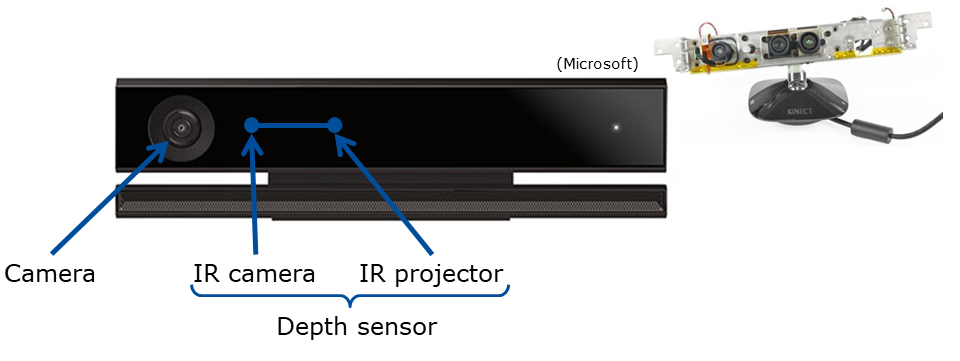

## Microsoft Kinect v2
Our Kinect has following parameters:
- Resolution depth camera: 512 x 424 px
- Measarment distance: 0.5-4.5 m
- Opening angle of depth camera
    - 70° horizontal
    - 60° vertical
- Focal distance f: 365.5953 px
- Center point
    - cx: 260.1922
    - cy: 209.5835

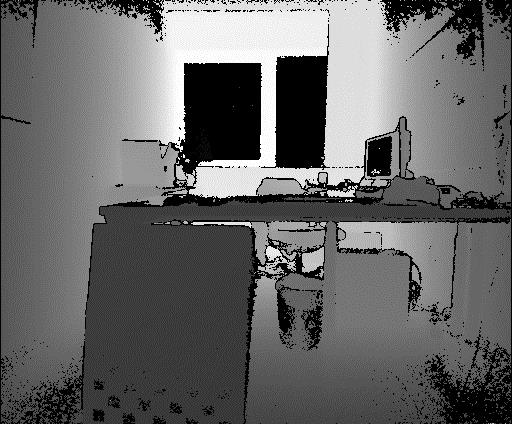



## Calculation
We are given $f,cx$ and $cy$ and based on the geometry of the sensor scetched below, we can compute the $x_w,y_w,z_w \in \mathbb{R}$ real world coordinates from $x_b,y_b \in \mathbb{N}$ from the depth image coordinates and $d \in \mathbb{R}$ distance measered for certain pixel $y_b,y_b$.

$\LARGE y_w=d$, $\LARGE x_w=\frac{(x_b-cx)y_w}{f}$ and  $\LARGE z_w=\frac{(y_b-cy)y_w}{f}$
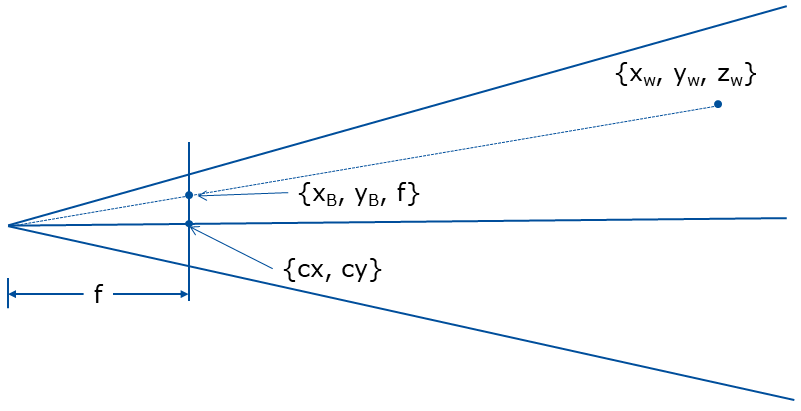

Please implement the `depth_to_world` function using the above formula.

In [6]:
import numpy as np
def depth_to_world(f, cx, cy, img):
    """ Converts depth raster to 3D coordinates
        f - Focal distance
        (cx, cy) - center point
        image - 2D Raster with depth values stored at each cell
        
        return: numpy array of 3d points
    """
    ### BEGIN SOLUTION
    points=[]
    for i in range(len(img)):
        for j in range(len(img[i])) :
            y_w=img[i][j]
            x_w=((j-cx) * y_w) / f
            z_w=((i-cy) * y_w) / f
            points.append([x_w,y_w,z_w])
    points=np.array(points)

    ### END SOLUTION
    
#    raise NotImplementedError()
    
    return points    

Please explain your code here:

In this function we need 4 parameters(f,cx,cy,img). F is focal distance, cx and cy are the center point of imgage. The parameter 'img' gives the depth of every pixel and the resolution depth camera is 512 x 424 px, we use the first loop to traverse 424 pixel and the second loop to traverse 512 pixel and then we can get the value(d) of the corresponding pixel. The value d is real world coordinates of y_w, we can use the above formula to calculate x_w and z_w. At last return real world 3d points of the img.

SOME SENTENCES

In [7]:
# load image
img = imread('depthImage.PNG')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  


In [8]:
# # convert loaded image and visualize your point cloud using scatteplot or your prefered tool like CloudCompare. 
# # if you are using an external tool for visualization, please paste your result in the notebook. 

# ### BEGON SOLUTION
# import numpy as np
# import ipyvolume.pylab as ply
# f=365.5953
# cx= 260.1922
# cy= 209.5835
# img = imread('depthImage.PNG')
# points=depth_to_world(f, cx, cy, img)
# ply.scatter(points[:,0], points[:,1], points[:,2], color='blue')
# ply.show()
# ### END SOLUTION

# #raise NotImplementedError()

<u>Please explain your code and findings here:</u>

The parameters f,cx,cy and img are given, and use the function 'depth_to_world' to get the real world 3d points and then we use the tool 'ipyvolume.pylab' to visualize our points.

From this result we can clearly see the table, wall and window, but it is difficult to identify small things on the table. This means we can only see big object. Due to noise we can not perfectly transform all objects from depth image. So the problem of this method is that, we can only recognize objects with very distinct features, but small objects can not match the depth image very well.

SOME SENTENCES